In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [67]:
datos = pd.read_excel('/content/sample_data/pca.xlsx') #tarda un poco...

In [68]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [73]:
file_path = "/content/sample_data/pca.xlsx"
df = pd.read_excel(file_path)

In [74]:
excel_file_path = "/content/sample_data/pca.xlsx"

In [75]:
df = df.drop(df.columns[0], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


verifico si haya valores nulos o duplicados y los borra.

In [76]:
import pandas as pd


file_path = "/content/sample_data/pca.xlsx"
df = pd.read_excel(file_path)
df = df.drop(df.columns[0], axis=1)


# Chequea si hay valores nulos
print("Null values per column:\n", df.isnull().sum())

# Chequea si hay valores duplicados
duplicate_rows = df[df.duplicated()]
print("\nNumber of duplicated rows:", len(duplicate_rows))

if not duplicate_rows.empty:
    print("\nDuplicated rows:\n", duplicate_rows)

Null values per column:
 V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Number of duplicated rows: 9144

Duplicated rows:
               V1        V2        V3        V4        V5        V6        V7  \
33     -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223  0.711206   
35     -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983  0.693039   
113     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
114     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
115     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
...          ...       ...       ...       ...       ...       ...    

In [78]:
# Escalar los datos antes de aplicar PCA
X = datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

LLAMAMOS AL PCA

In [85]:
pca = PCA()
pca.fit(X_scaled)


PCA()

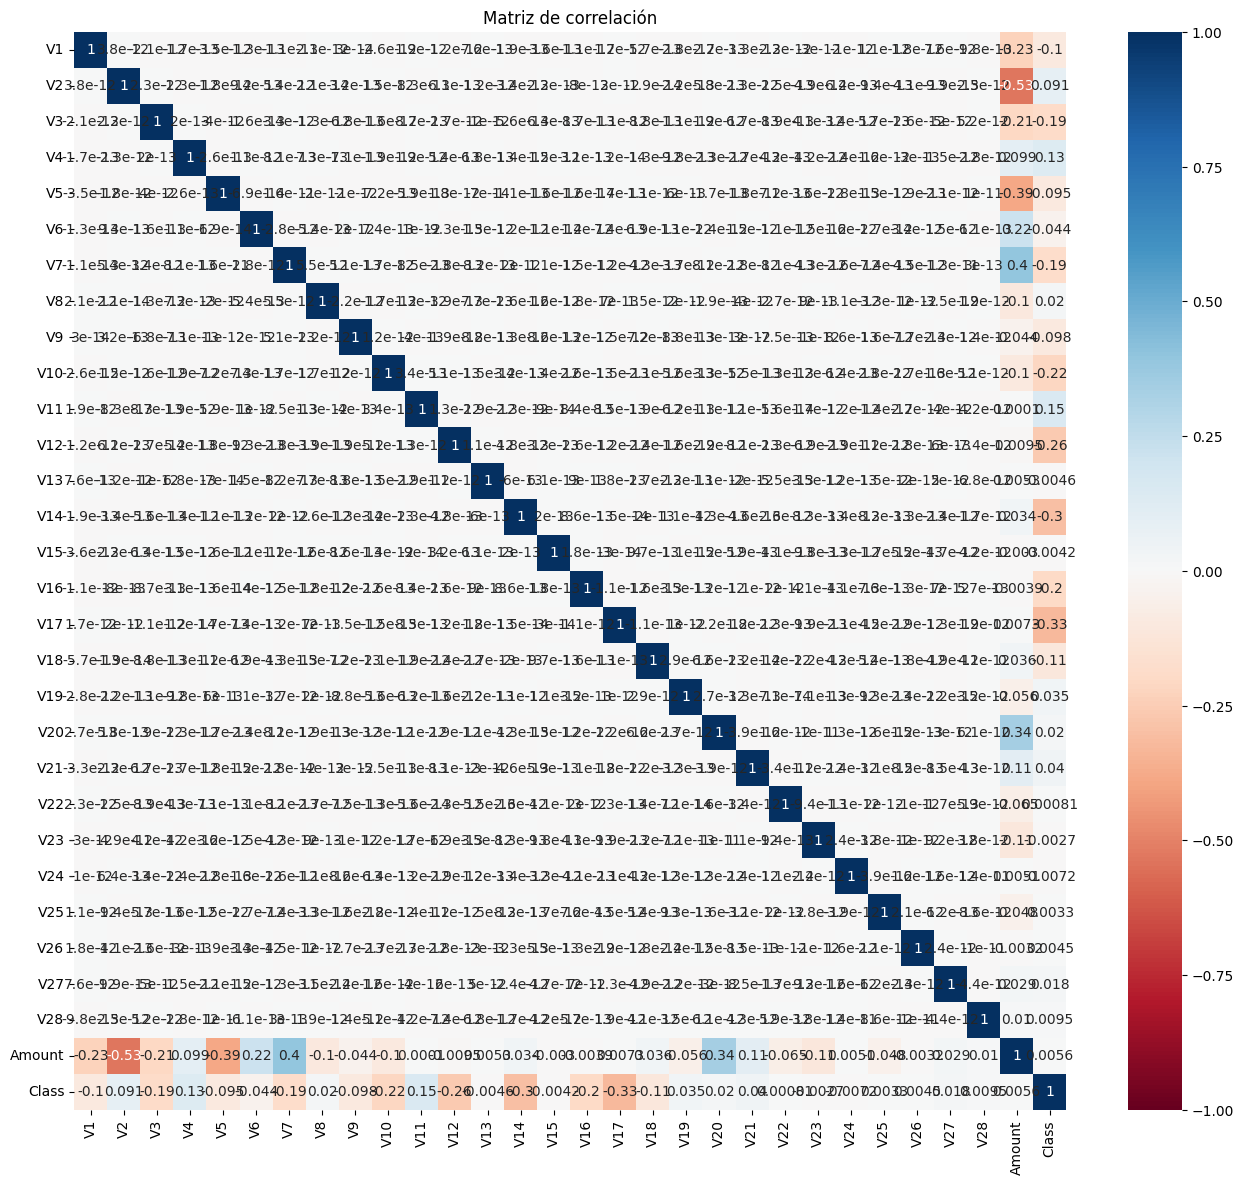

In [90]:
corr = df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0)

plt.title('Matriz de correlación')
plt.show()

In [110]:
pca_components = pca.transform(X_scaled)
df_pca = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(X_scaled.shape[1])])

eigenvalues = pca.explained_variance_

eigenvectors = pca.components_

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance_ratio)


print("Componentes principales:")
print(df_pca)

print("\nAutovalores:")
print(eigenvalues)

print("\nAutovectores:")
print(eigenvectors)

Componentes principales:
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       0.418406  0.707299 -2.431435  0.854200  0.007199 -0.189878 -0.117652   
1      -0.392155  0.577863 -1.995835 -0.702822 -0.792665  0.558789  0.206370   
2       1.870339  0.698912 -2.433160  0.263823 -0.828415  2.205580  0.165293   
3       0.316741  0.485520 -1.716020  0.189020 -0.787883  0.349519 -0.843125   
4      -0.003562  0.407770 -1.431511  0.531269  0.476205 -0.561000  0.569033   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -1.508749 -1.357724  1.560142 -1.917072  0.915916 -2.537363  1.524650   
284803 -0.368583 -0.290892  0.791431 -0.201468 -0.616395  1.847756  0.361414   
284804 -0.195524 -0.563556  1.993942 -0.129486 -0.120169 -0.468357  0.512458   
284805 -0.468779 -0.436595  1.146849  0.893445  0.588746 -2.037523  0.302022   
284806  0.764743 -0.615435  1.805574  1.332226  0.275662  0.810578 -0.468977   

             P

PESO DE LOS COMPONENTES PRINCIPALES POR VARIABLE

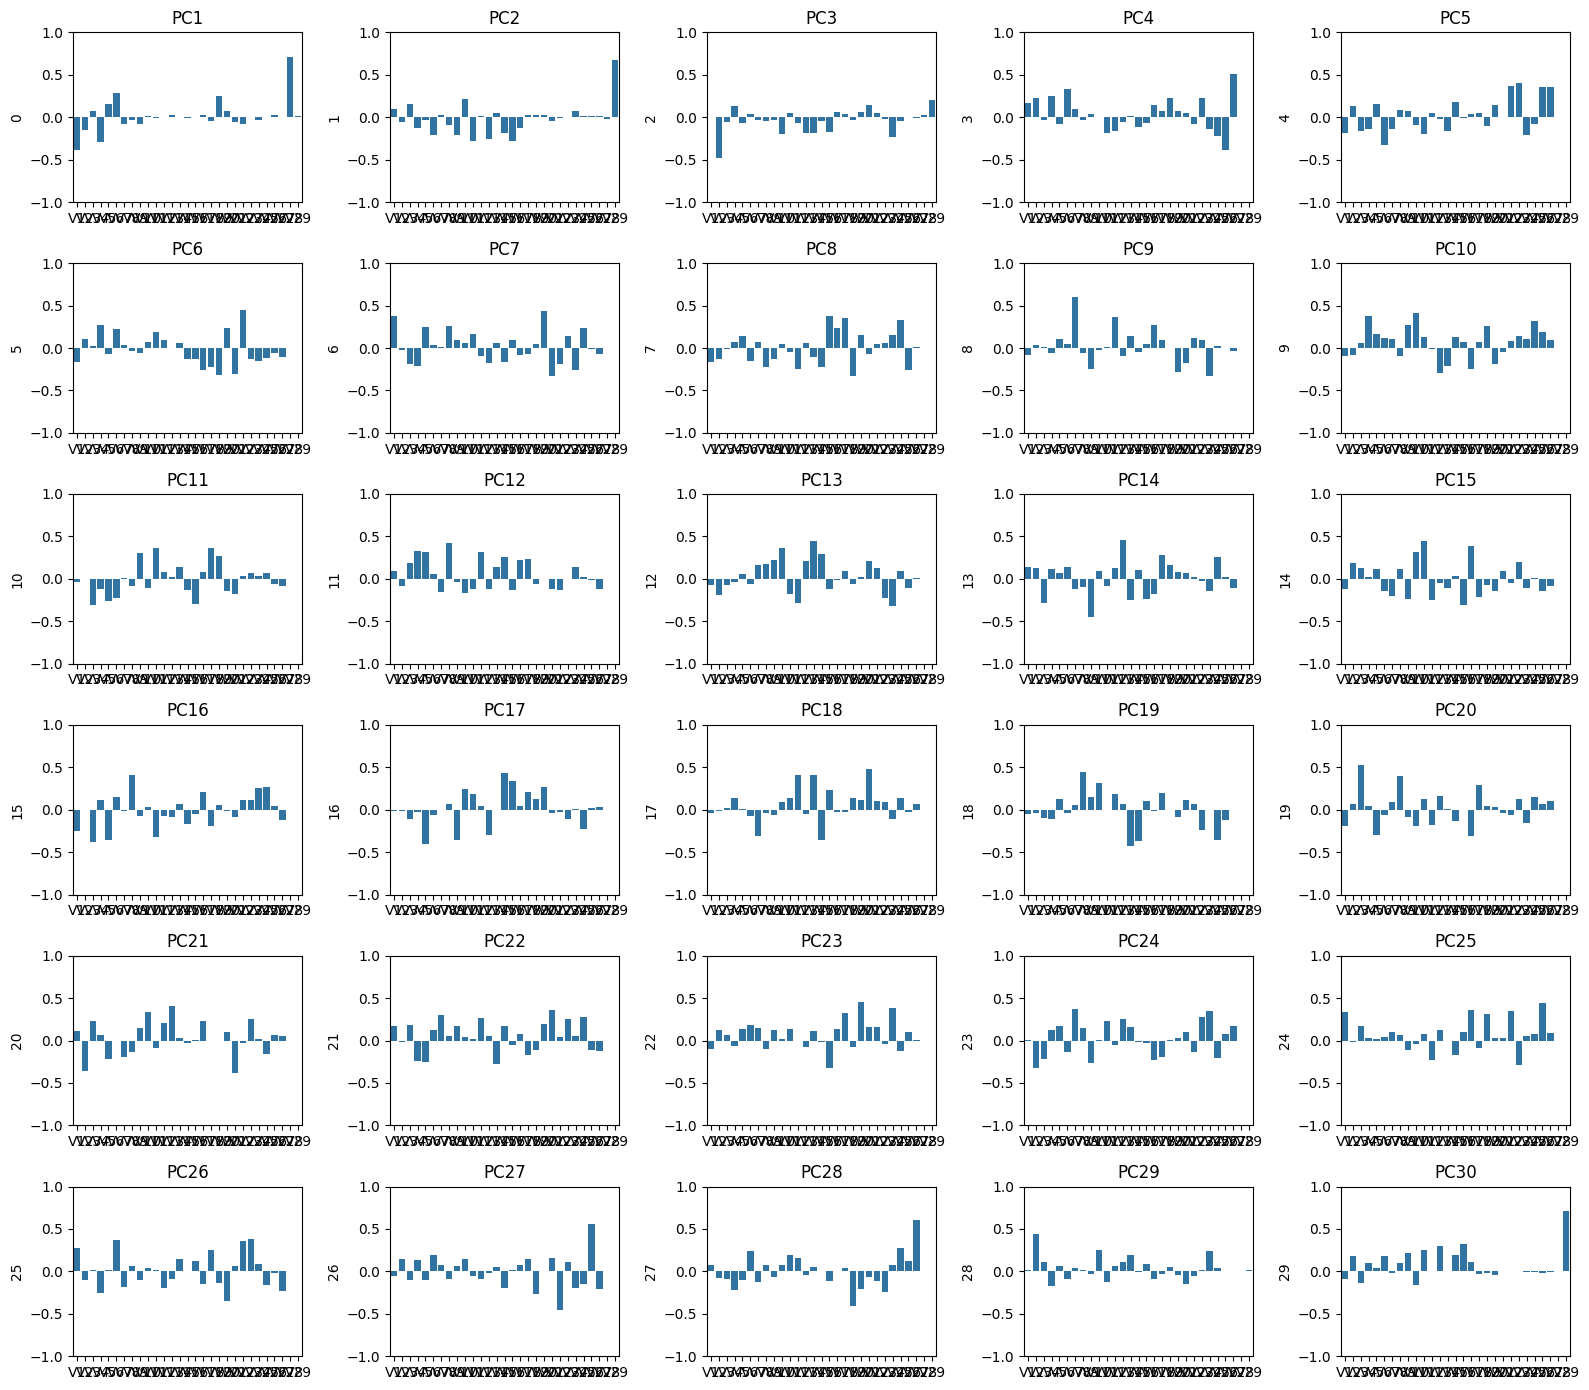

In [128]:
autovectors = pca.components_[:30, 2:]

autovectors_df = pd.DataFrame(autovectors, columns=df.columns[:autovectors.shape[1]])
num_rows = 6
num_cols = 5

plt.figure(figsize=(16, 14))

for i in range(autovectors_df.shape[0]):
    plt.subplot(num_rows, num_cols, i + 1)
    x_labels = [f'V{j + 1}' for j in range(len(autovectors_df.columns))]
    sns.barplot(x=x_labels, y=autovectors_df.iloc[i])
    plt.title(f'PC{i + 1}')
    plt.ylim(-1, 1)

plt.tight_layout()
plt.show()


TABLA CON LAS DOS PRIMERAS COMPONENTES CON MAS PESOS

In [131]:
loading_matrix = pca.components_

loading_df = pd.DataFrame(loading_matrix,
                          columns=[f'Feature_{i+1}' for i in range(loading_matrix.shape[1])], #
                          index=[f'PC{i+1}' for i in range(len(loading_matrix))])
results = []

top_n = 2
for i in range(loading_df.shape[0]):
    pc_name = loading_df.index[i]
    top_weights = loading_df.iloc[i].abs().nlargest(top_n)
    variable1 = top_weights.index[0]
    weight1 = top_weights.iloc[0]
    variable2 = top_weights.index[1]
    weight2 = top_weights.iloc[1]

    results.append([pc_name, variable1, weight1, variable2, weight2])

weights_df = pd.DataFrame(results, columns=['Mayor peso para', 'Variable 1', 'Peso 1', 'Variable 2', 'Peso 2'])

print(weights_df)

   Mayor peso para  Variable 1    Peso 1  Variable 2    Peso 2
0              PC1  Feature_30  0.706514   Feature_3  0.390008
1              PC2  Feature_31  0.677397  Feature_18  0.283920
2              PC3   Feature_1  0.675300   Feature_4  0.480739
3              PC4  Feature_29  0.505281  Feature_28  0.390813
4              PC5  Feature_25  0.400696  Feature_24  0.362639
5              PC6  Feature_24  0.449004  Feature_21  0.316639
6              PC7  Feature_22  0.441515   Feature_3  0.379613
7              PC8  Feature_18  0.379426  Feature_20  0.349951
8              PC9   Feature_9  0.604237  Feature_14  0.360261
9             PC10  Feature_12  0.409512   Feature_6  0.381360
10            PC11  Feature_13  0.361849  Feature_20  0.361762
11            PC12  Feature_10  0.423043   Feature_6  0.334418
12            PC13  Feature_16  0.447445  Feature_12  0.362000
13            PC14  Feature_15  0.460577  Feature_11  0.443232
14            PC15  Feature_13  0.445465  Feature_19  0

MAPA DE CALOR

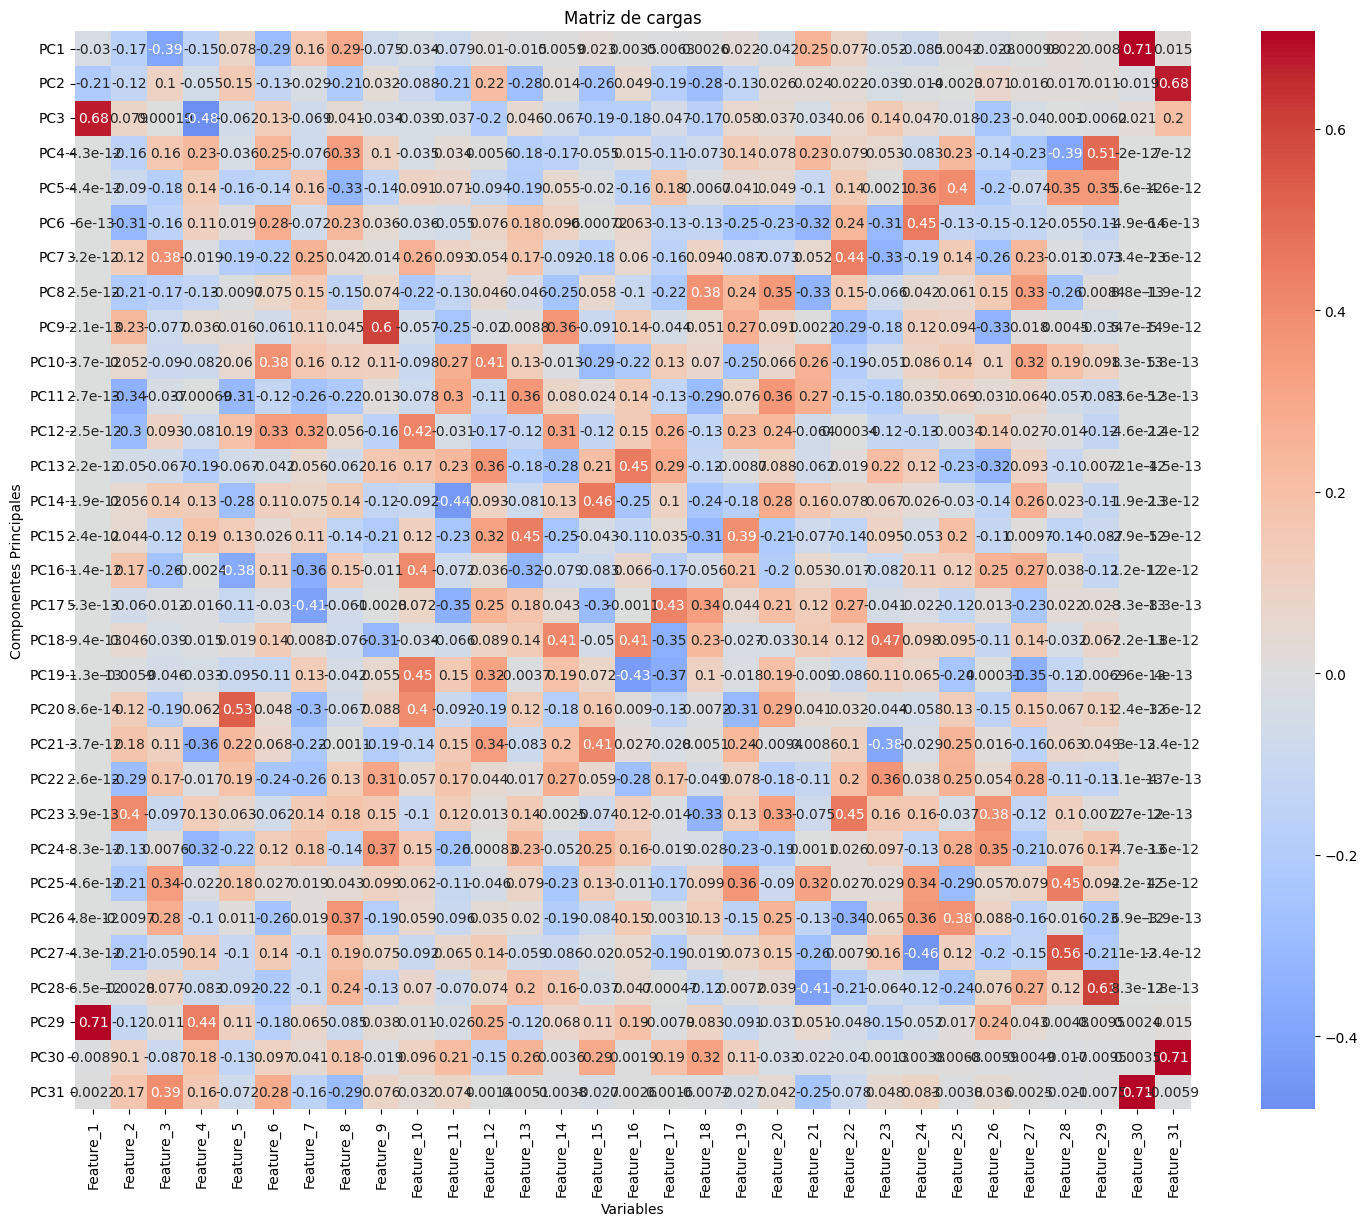

In [133]:
plt.figure(figsize=(18, 14))
sns.heatmap(loading_df, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de cargas')
plt.xlabel('Variables')
plt.ylabel('Componentes Principales')
plt.show()

VARIANZA ACUMULADA E INVIDUAL

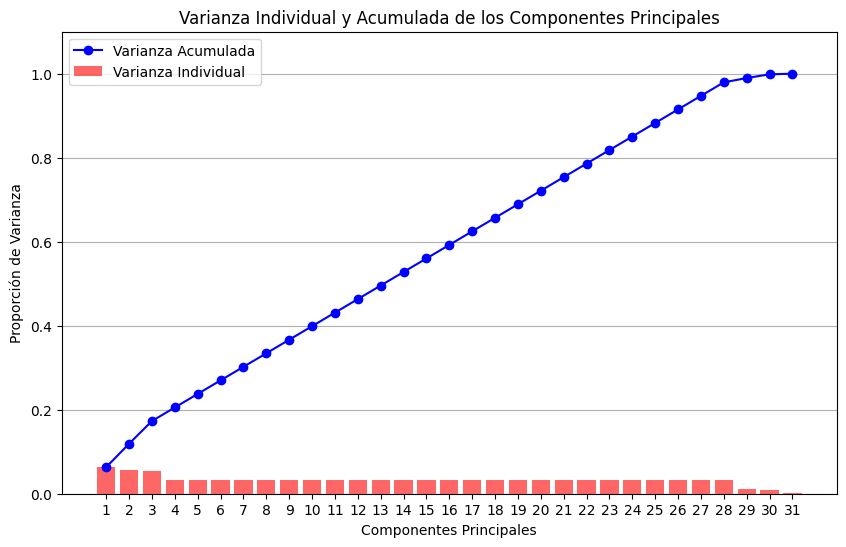


Varianza explicada por cada componente principal:
[0.06317253 0.05567489 0.0541873  0.03225806 0.03225806 0.03225806
 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806 0.03225806
 0.03225806 0.03225806 0.03225806 0.03225806 0.01019073 0.00896357
 0.00135937]

Varianza acumulada:
[0.06317253 0.11884742 0.17303472 0.20529278 0.23755085 0.26980891
 0.30206698 0.33432504 0.3665831  0.39884117 0.43109923 0.4633573
 0.49561536 0.52787343 0.56013149 0.59238956 0.62464762 0.65690569
 0.68916375 0.72142181 0.75367988 0.78593794 0.81819601 0.85045407
 0.88271214 0.9149702  0.94722827 0.97948633 0.98967706 0.99864063
 1.        ]


In [134]:
total_variance = sum(eigenvalues)

individual_variance_ratio = eigenvalues / total_variance

cumulative_variance = np.cumsum(individual_variance_ratio)

plt.figure(figsize=(10, 6))

plt.bar(range(1, len(individual_variance_ratio) + 1), individual_variance_ratio, alpha=0.6, label='Varianza Individual', color='red')

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Varianza Acumulada', color='blue')

plt.title('Varianza Individual y Acumulada de los Componentes Principales')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza')
plt.xticks(range(1, len(individual_variance_ratio) + 1))
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y')

plt.show()

print("\nVarianza explicada por cada componente principal:")
print(explained_variance_ratio)

print("\nVarianza acumulada:")
print(cumulative_variance)